<a href="https://colab.research.google.com/github/ronnyfahrudin/Visualization/blob/master/python/visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi for Exploratory Data Analysis

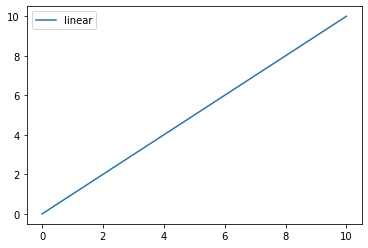

In [ ]:
#import necessary 
import matplotlib.pyplot as plt
import numpy as np

#prepare the data
x = np.linspace(0, 10)
plt.plot(x, x, label ='linear')
plt.legend()
plt.show()

# Anatomy Matplotlib
- ada figure text
- ada figure subtitle
- plot title
- axes text
- acceleration

Pyplot or Pylab?

-  each other it's same modul in Matplotlib. 
pyplot: menyederhanakan pembuatan plot tanpa harus secara eksplisit memanggil figure dan axis.

pylab: gabungan dari pyplot dan numpy. Advance visualization and more detil and spesifik

# Pyplot
1. ada Subplot

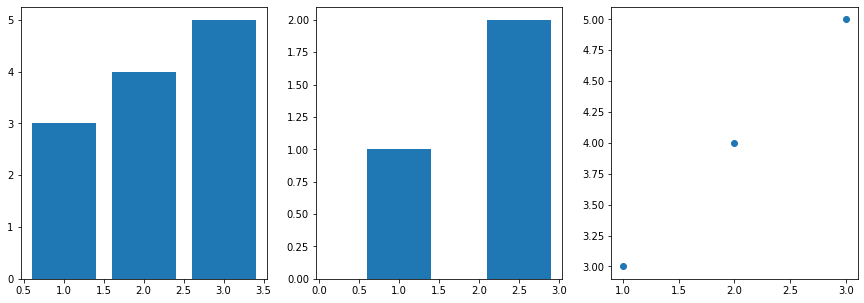

In [ ]:
# initialize the plot

fig = plt.figure(figsize=(15,5)) # membuat figure
ax1 = fig.add_subplot(131) #1 jumlah baris, 2 kolom, di posisi ke 1 positioningnya
ax2 = fig.add_subplot(132) # 1 jumlah baris, 2 kolom, di posisi ke 2 positioningnya
ax3 = fig.add_subplot(133)

#or replace the three libes of code above by the following line:
#fig , (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

#add line
#ax1.axvline(0.65)
#ax2.axhline(0.45)

#plot the data
ax1.bar([1,2,3], [3,4,5])
ax2.bar([0.5,1,2.5], [0,1,2])
ax3.scatter([1,2,3],[3,4,5])

#save
plt.savefig('foo.png')
plt.savefig('foo tp.png', transparent=True)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_id = pd.read_csv('/content/drive/My Drive/datasets/data_covid_id.csv')
df_total = pd.read_csv('/content/drive/My Drive/datasets/data_covid_total.csv')
df_global = pd.read_csv('/content/drive/My Drive/datasets/data_global.csv')

In [ ]:
df_id

,tanggal,positif,sembuh,meninggal
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
147,6/17/20,41431,16243,2276
148,6/18/20,42762,16798,2339
149,6/19/20,43803,17349,2373
150,6/20/20,45029,17883,2429


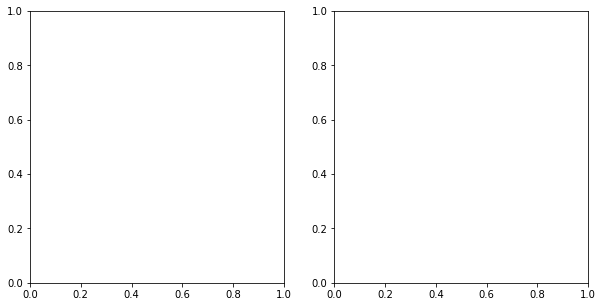

In [ ]:
fig = plt.figure(figsize=(10,5)) # make figure
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122)


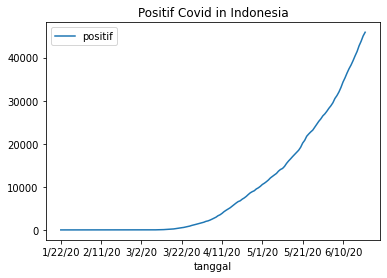

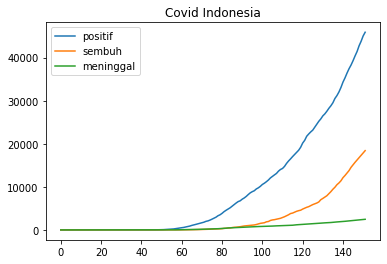

In [ ]:
df_id.plot(x = 'tanggal', y = 'positif', title = 'Positif Covid in Indonesia')
df_id.plot(title = 'Covid Indonesia')
plt.show()

In [ ]:
df_total.head()

,tanggal,positif,sembuh,meninggal
0,1/22/20,555,28,17
1,1/23/20,654,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


# Membandingkan beberapa negara
Buat data pembanding


In [ ]:
df_global.head()

,negara,latitude,longitude,positif,sembuh,meninggal
0,Afghanistan,33.0000,65.0000,28833,8764,581
1,Albania,41.1533,20.1683,1962,1134,44
2,Algeria,28.0339,1.6596,11771,8422,845
3,Andorra,42.5063,1.5218,855,792,52
4,Angola,-11.2027,17.8739,183,77,9


In [ ]:
plt.figure(figsize = (10,10))
#membuat data pembanding
banding = df_global[df_global['negara'].isin(['Indonesia', 'Singapore', 'Malaysia','Philippines'])]

<Figure size 720x720 with 0 Axes>

In [ ]:
banding.head()

,negara,latitude,longitude,positif,sembuh,meninggal
80,Indonesia,-0.7893,113.9213,45891,18404,2465
107,Malaysia,2.5000,112.5000,8572,8156,121
135,Philippines,13.0000,122.0000,30052,7893,1169
152,Singapore,1.2833,103.8333,42095,34942,26


# Membuat bar plot

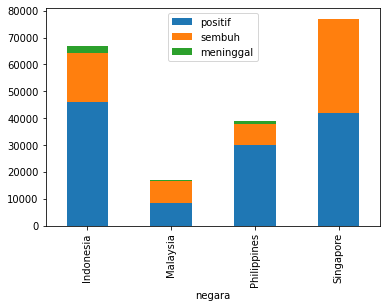

In [ ]:
# stacked bar chart

banding.plot.bar(x='negara', y=['positif', 'sembuh', 'meninggal'], stacked=True) 


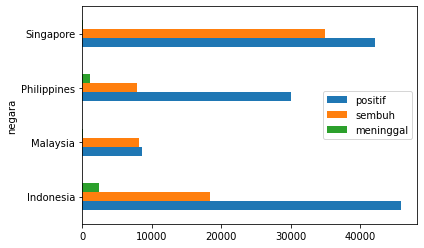

In [ ]:
#tanpa stacked
banding.plot.barh(x='negara', y=['positif', 'sembuh', 'meninggal'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


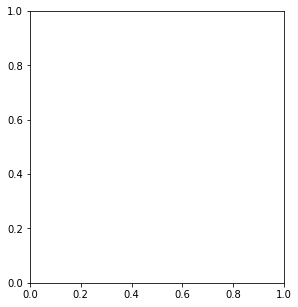

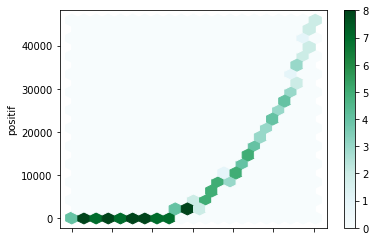

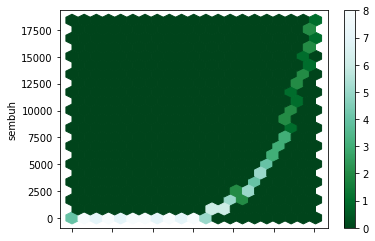

In [ ]:
new_df_id = df_id.copy()
new_df_id['hari']=range(len(df_id)) #generate angka dari 0 sampai jumlah baris

# initialize the plot
figc = plt.figure(figsize=(10,5))
ax1= figc.add_subplot(121)
ax2= figc.add_subplot(121)

ax1 = new_df_id.plot.hexbin(x='hari', y='positif', gridsize=20)
ax2 = new_df_id.plot.hexbin(x='hari', y='sembuh', gridsize=20,
                           cmap=plt.cm.BuGn_r)

(array([[16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  9.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  7.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  4.,  5.]]),
 array([  0. ,  15.1,  30.2,  45.3,  60.4,  75.5,  90.6, 105.7, 120.8,
        135.9, 151. ]),
 array([    0. ,  4589.1,  9178.2, 13767.3, 18356.4, 22945.5, 27534.6,
        32123.7, 36712.8, 41301.9, 45891. ]),
 <matplotlib.collections.QuadMesh at 0x7f69b18dc710>)

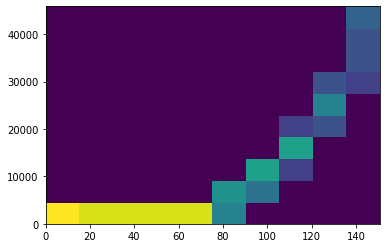

In [ ]:
#histogram 2 dimensi
x = new_df_id['hari']
y = new_df_id['positif']
plt.hist2d(x, y)

# Menampilkan data teratas

In [ ]:
def teratas(df, col, n):
    df_temp=df.sort_values(col, ascending=False) # diurutkan yang paling besar ke paling kecil
    return df_temp[:n]

# top_covid = all_negara
positif = teratas(df_global, 'positif', 30) # mengambil 30 terbesar
sembuh = teratas(df_global, 'sembuh',30) # mengambil 30 terbesar
meninggal=teratas(df_global, 'meninggal',30)

In [ ]:
positif.set_index('negara', inplace=True)
sembuh.set_index('negara', inplace=True)
meninggal.set_index('negara', inplace=True)

In [ ]:
positif.head()

,latitude,longitude,positif,sembuh,meninggal
negara,,,,,
US,37.090200,-95.712900,2279879,622133,119969
Brazil,-14.235000,-51.925300,1083341,588118,50591
Russia,60.000000,90.000000,583879,339142,8101
India,21.000000,78.000000,425282,237196,13699
United Kingdom,24.548173,-43.902245,305803,1319,42717


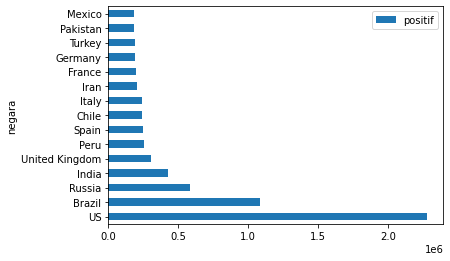

In [ ]:
# menampilkan data positif 15 terbanyak 
positif[:15].plot.barh(y = 'positif')

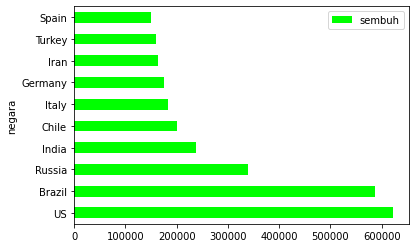

In [ ]:
sembuh[:10].plot.barh(y='sembuh',color='lime')

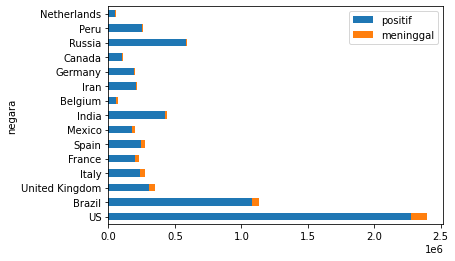

In [ ]:
meninggal[:15].plot.barh(y=['positif', 'meninggal'], stacked=True)

# Warna Plot
di documentasi matplotlib nyari googling aja

# Melihat Rasion

In [ ]:
list_total = [df_total.iloc[-1]['positif'], df_total.iloc[-1]['sembuh'], df_total.iloc[-1]['meninggal']]
list_total

[8952428, 4434628, 468331]

In [ ]:
# bikin df yang berisi rasio masing-masing negara
list_rasio = [df_global['negara'],df_global['positif'].apply(lambda x: 100*x/list_total[0]),
             df_global['sembuh'].apply(lambda x: 100*x/list_total[1]),
             df_global['meninggal'].apply(lambda x: 100*x/list_total[2])]
df_rasio = pd.DataFrame(list_rasio).T

df_rasio.head()

,negara,positif,sembuh,meninggal
0,Afghanistan,0.322069,0.197626,0.124058
1,Albania,0.0219158,0.0255715,0.00939506
2,Algeria,0.131484,0.189914,0.180428
3,Andorra,0.00955048,0.0178594,0.0111033
4,Angola,0.00204414,0.00173634,0.00192172


# Membuat Diagaram Ven

In [ ]:
!pip install matplotlib_venn

In [ ]:
from matplotlib_venn import venn3

In [ ]:
positif.index.values.tolist()

['US',
 'Brazil',
 'Russia',
 'India',
 'United Kingdom',
 'Peru',
 'Spain',
 'Chile',
 'Italy',
 'Iran',
 'France',
 'Germany',
 'Turkey',
 'Pakistan',
 'Mexico',
 'Saudi Arabia',
 'Bangladesh',
 'Canada',
 'South Africa',
 'Qatar',
 'China',
 'Colombia',
 'Belgium',
 'Belarus',
 'Sweden',
 'Egypt',
 'Ecuador',
 'Netherlands',
 'Indonesia',
 'United Arab Emirates']

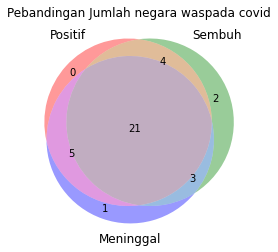

In [ ]:
A = set(positif.index.values.tolist())
B = set(sembuh.index.values.tolist())
C = set(meninggal.index.values.tolist())

diagram_venn=venn3([A,B,C], set_labels = (['Positif','Sembuh','Meninggal']))
plt.title('Pebandingan Jumlah negara waspada covid')
plt.show()

In [ ]:
# mencari intersection antara A dengan gabungan B, C

In [ ]:
print(A.intersection(B,C)) # sama dengan teori himpunan dalam matematika
# A itu positif 
# negara dengan peningkatan covid tercepat
len(A.intersection(B,C))

{'Bangladesh', 'US', 'Germany', 'Colombia', 'India', 'China', 'Spain', 'Indonesia', 'Ecuador', 'Iran', 'Peru', 'Pakistan', 'Chile', 'France', 'Brazil', 'Italy', 'Turkey', 'Canada', 'South Africa', 'Russia', 'Mexico'}


21

# operasi apa saja dalam set?
| --> for union.

& --> for intersection

_ - _ --> for different ( - )

^ --> for symetric differenc

In [ ]:
# B sembuh
# C meninggal

B-A # negara yang jumlah positif masuk 20 besar tapi sembuh juga masuk teratas

{'Ireland', 'Kuwait', 'Portugal', 'Singapore', 'Switzerland'}

In [ ]:
B - (A|C) #negara yang jumlah positif + meninggal tidak masuk 20 besar tapi sembuh masuk teratas

{'Kuwait', 'Singapore'}

# Menggunakan Seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


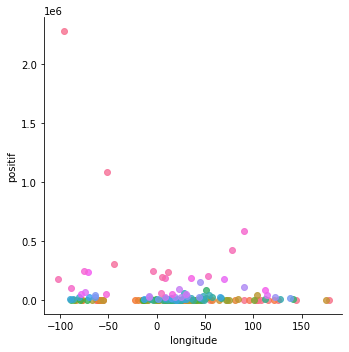

In [ ]:
import seaborn as sns
g = sns.lmplot(x = 'longitude', y = 'positif', data=df_global,
              fit_reg = False,
              hue='meninggal')
g._legend.remove()

Text(0.5, 1.0, 'positif berdasarkan longitude dan latitude')

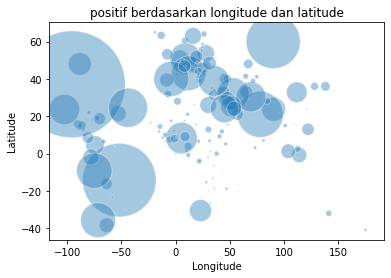

In [ ]:
plt.scatter(x= df_global['longitude'],
           y = df_global['latitude'],
           s = df_global['positif']*0.005,
           alpha=0.4,
           edgecolors='w')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('positif berdasarkan longitude dan latitude')

## 3D Data

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_global

,negara,latitude,longitude,positif,sembuh,meninggal
0,Afghanistan,33.000000,65.000000,28833,8764,581
1,Albania,41.153300,20.168300,1962,1134,44
2,Algeria,28.033900,1.659600,11771,8422,845
3,Andorra,42.506300,1.521800,855,792,52
4,Angola,-11.202700,17.873900,183,77,9
...,...,...,...,...,...,...
183,West Bank and Gaza,31.952200,35.233200,833,439,3
184,Western Sahara,24.215500,-12.885800,9,8,1
185,Yemen,15.552727,48.516388,941,347,256
186,Zambia,-15.416700,28.283300,1430,1194,11


Text(0.5, 0, 'positif')

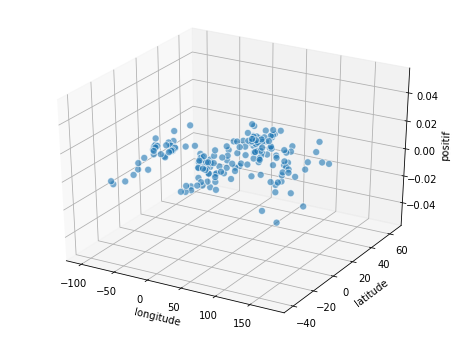

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111,projection='3d')

xs = df_global['longitude'] 
ys = df_global['latitude']
zs = df_global['positif']
ax.scatter(xs, ys, s=50, alpha=0.6, edgecolors = 'w', marker='o')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('positif')

In [ ]:
!pip install folium

In [ ]:
import folium
def generateBaseMap(default_location=[-7.8682695, 120.33345], default_zoom_start=4):
    base_map = folium.Map(location=default_location, 
                          control_scale=True, 
                          zoom_start=default_zoom_start)
    return base_map
base_map=generateBaseMap()
base_map

In [ ]:
# maping poitive covid
base_map=generateBaseMap()
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['positif']),#the bigger the positive, the bigger the circle
                 #popup = df_global.iloc[i], #so that the information appears when clicked
                 color='crimsun',#with color 
                 fill=True, #the circle inside also has a color
                 fill_color = 'crimson').add_to(base_map)
# Circle =  making bullets a number of countries because of using len (df_global)
base_map

In [ ]:
# positive maping
base_map=generateBaseMap()
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['sembuh']),#the bigger the positive, the bigger the circle
                 #popup = df_global.iloc[i], #so that the information appears when clicked
                 color='crimson',#with color
                 fill=True, #the circle inside also has a color
                 fill_color = 'crimson').add_to(base_map)
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['positif']),
                 #popup = df_global.iloc[i], 
                 color='yellow',
                 fill=True, 
                 fill_color = 'yellow').add_to(base_map)
# Circle =  making bullets a number of countries because of using len (df_global)
base_map